### Dayo, Andrea Louise G. 
### 3CSA - CS ELEC 1A
### LabEx2: Train Your Own Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
import warnings
warnings.filterwarnings('ignore')

In [167]:
df = pd.read_csv("diabetes.csv")

In [168]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Visualization

In [170]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Density'>

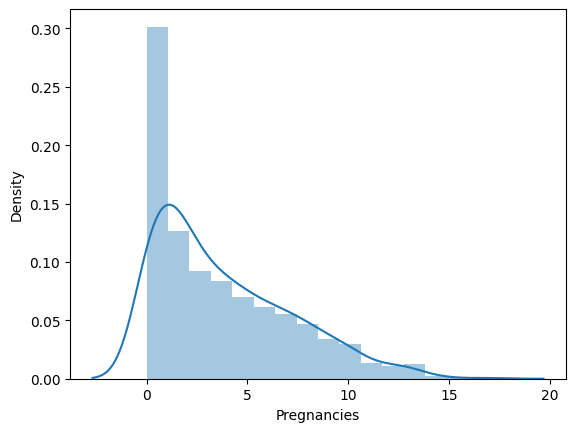

In [171]:
sns.distplot(df['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Density'>

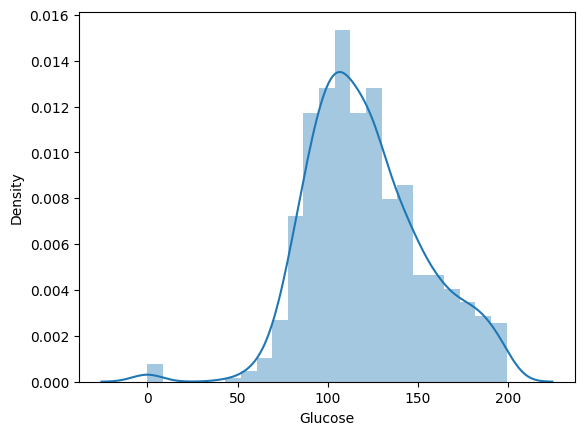

In [172]:
sns.distplot(df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Density'>

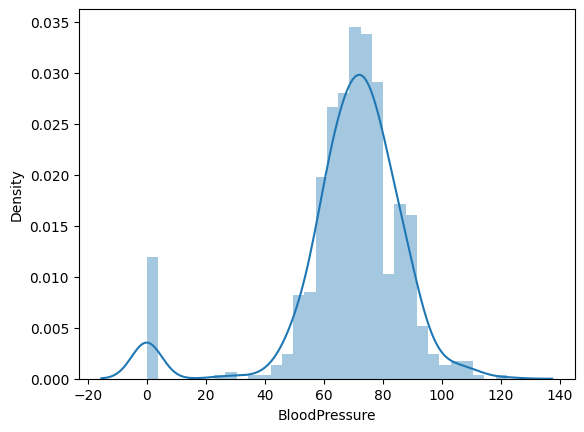

In [173]:
sns.distplot(df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

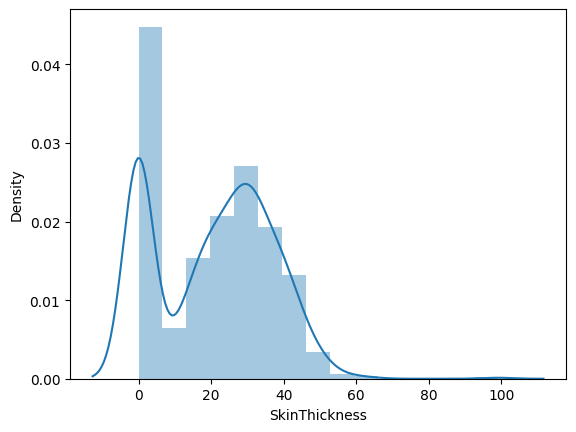

In [174]:
sns.distplot(df['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Density'>

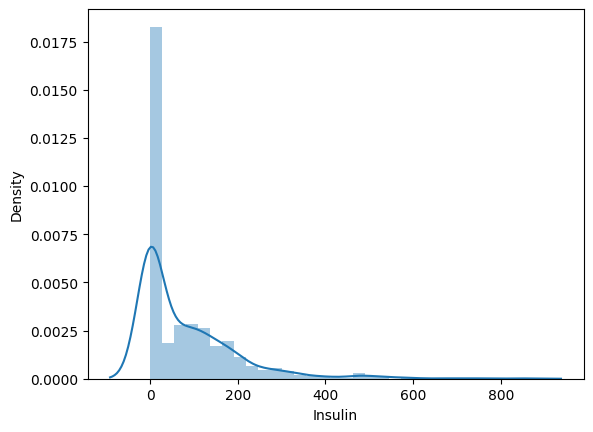

In [175]:
sns.distplot(df['Insulin'])

<Axes: xlabel='BMI', ylabel='Density'>

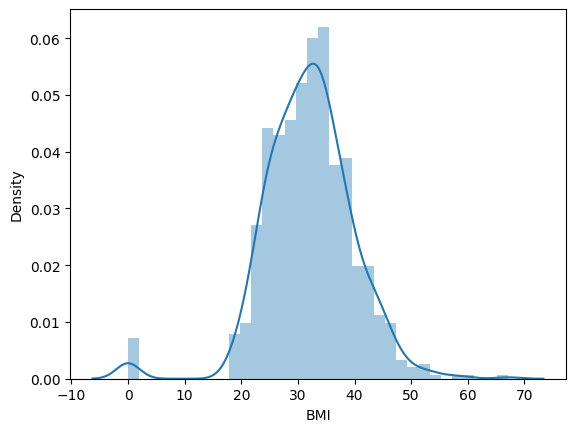

In [176]:
sns.distplot(df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

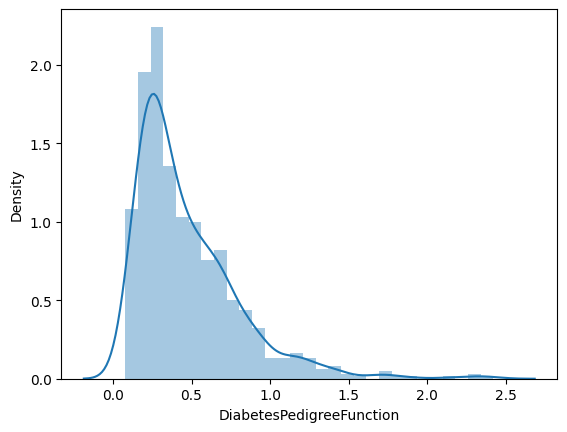

In [177]:
sns.distplot(df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age', ylabel='Density'>

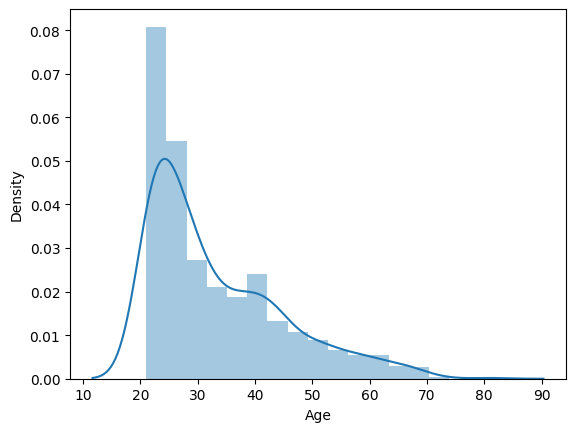

In [178]:
sns.distplot(df['Age'])

# Preprocessing

In [179]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 

### Remove suspicious data with zeroes

In [180]:
columns_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace_zeros] = df[columns_to_replace_zeros].replace(0, pd.NA)

# Remove rows with NaN (null) values in any of the selected columns
df = df.dropna(subset=columns_to_replace_zeros)

In [181]:
df.shape

(392, 9)

### Cleaning Outliers for Integer Data Type

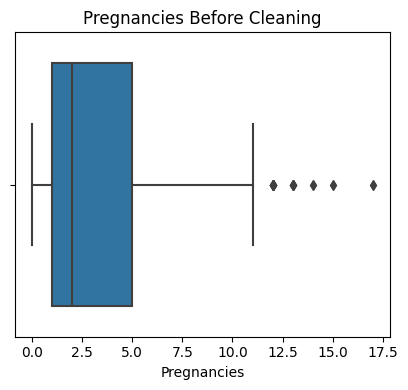

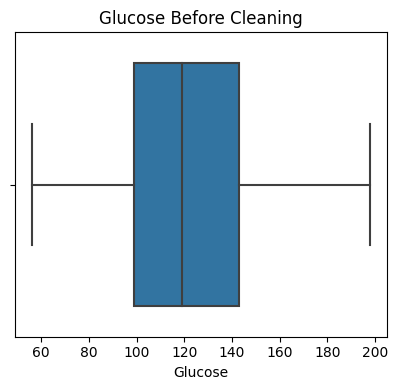

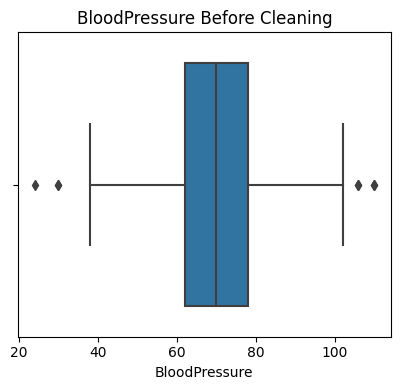

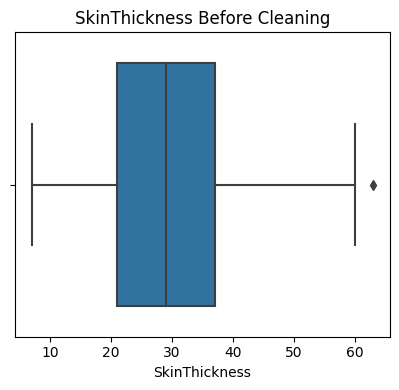

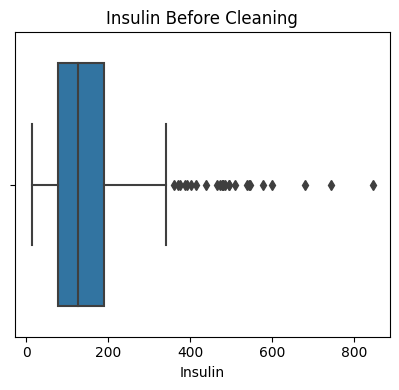

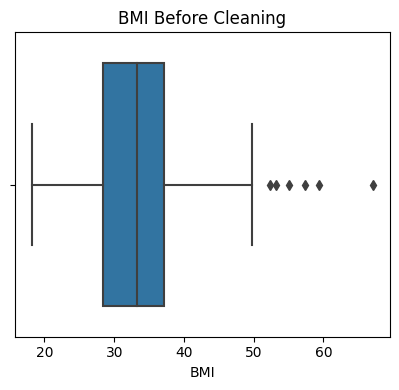

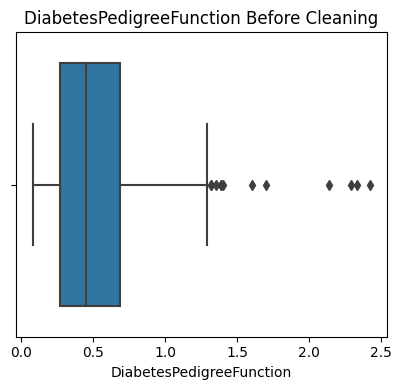

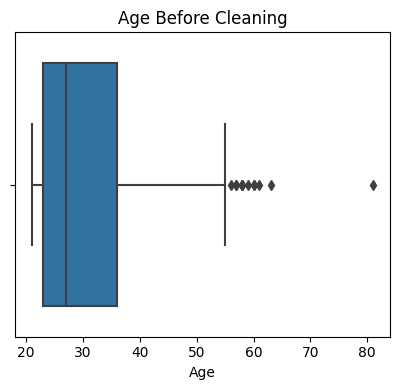

In [182]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])  
    plt.title(f'{column_name} Before Cleaning') 
    
    plt.tight_layout()
    plt.show()

In [183]:
df.shape

(392, 9)

In [184]:

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column_name] >= Q1 - 1.5*IQR) & (df[column_name] <= Q3 + 1.5*IQR)]

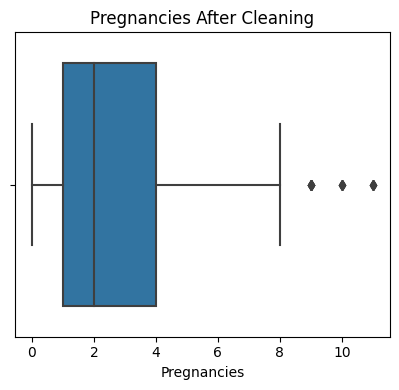

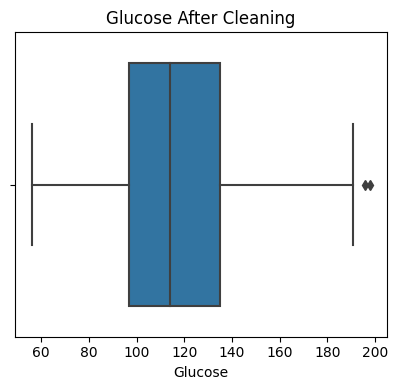

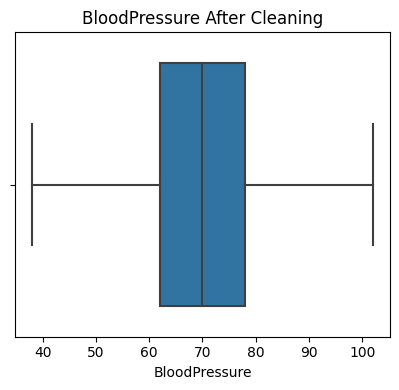

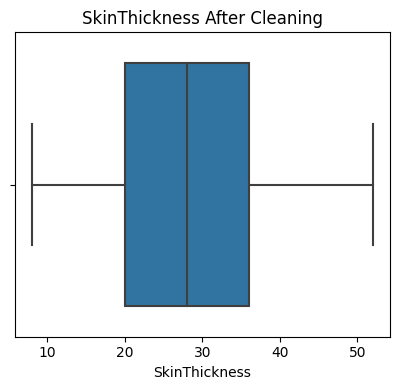

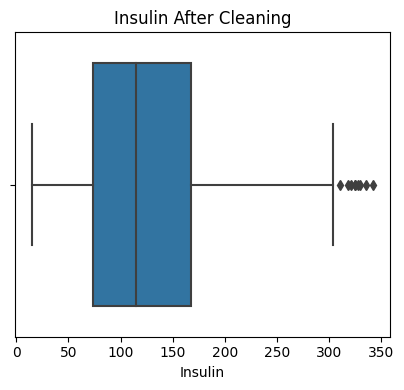

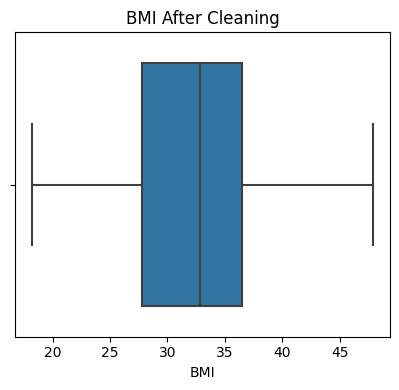

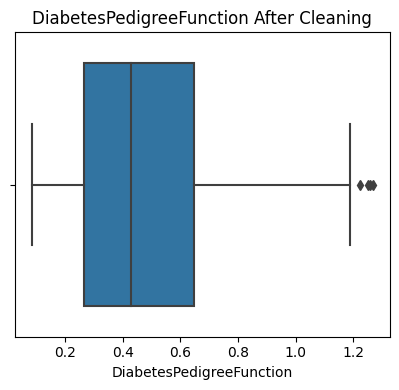

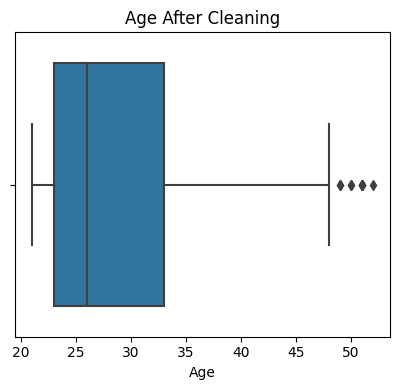

In [185]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])  
    plt.title(f'{column_name} After Cleaning') 
    plt.tight_layout()
    plt.show()

In [186]:
df.shape

(321, 9)

In [187]:
df['Outcome'].value_counts()

Outcome
0    234
1     87
Name: count, dtype: int64

# Feature Engineering
### Create Categorical Features

**Pregnancies**

In [188]:
def categorize_pregnancies(pregnancies):
    if pregnancies <= 0:
        return 'Zero Pregnancies'
    elif pregnancies < 3:
        return 'Low Pregnancies'
    elif pregnancies < 6:
        return 'Moderate Pregnancies'
    else:
        return 'High Pregnancies'

df['Pregnancies_Category'] = df['Pregnancies'].apply(categorize_pregnancies)

In [189]:
df.groupby("Pregnancies_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                          mean count
Pregnancies_Category                
High Pregnancies      0.452830    53
Low Pregnancies       0.172662   139
Moderate Pregnancies  0.325301    83
Zero Pregnancies      0.260870    46

<BarContainer object of 4 artists>

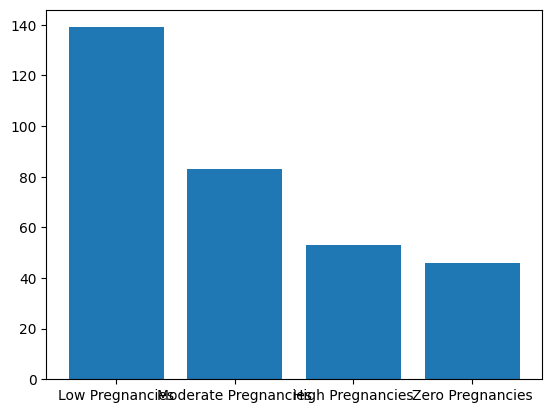

In [190]:
plt.bar(df['Pregnancies_Category'].value_counts().index, df['Pregnancies_Category'].value_counts().values)

**Glucose**

In [191]:
def categorize_glucose(glucose):
    if glucose < 70:
        return 'Hypoglycemia'
    elif glucose < 100:
        return 'Normal Glucose'
    elif glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['Glucose_Category'] = df['Glucose'].apply(categorize_glucose)

In [192]:
df.groupby("Glucose_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                      mean count
Glucose_Category                
Diabetes          0.531532   111
Hypoglycemia      0.000000     3
Normal Glucose    0.054348    92
Prediabetes       0.200000   115

<BarContainer object of 4 artists>

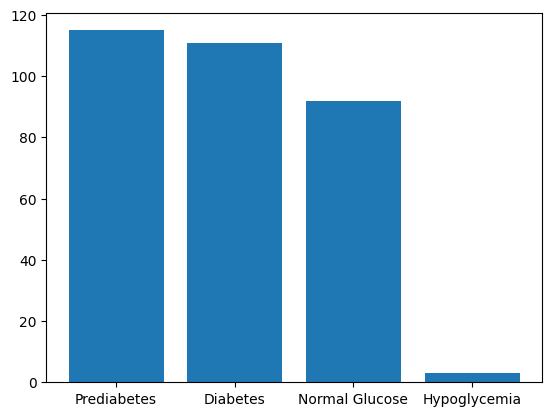

In [193]:
plt.bar(df['Glucose_Category'].value_counts().index, df['Glucose_Category'].value_counts().values)

**Blood Pressure**

In [194]:
def categorize_bp(bp):
    if bp < 60:
        return 'Low BP'
    elif bp < 80:
        return 'Normal BP'
    elif bp < 90:
        return 'Moderate BP'
    elif bp < 120:
        return 'High BP'
    else:
        return 'Very High BP'

df['BP_Category'] = df['BloodPressure'].apply(categorize_bp)


In [195]:
df.groupby("BP_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                 mean count
BP_Category                
High BP      0.500000    10
Low BP       0.132075    53
Moderate BP  0.389831    59
Normal BP    0.261307   199

<BarContainer object of 4 artists>

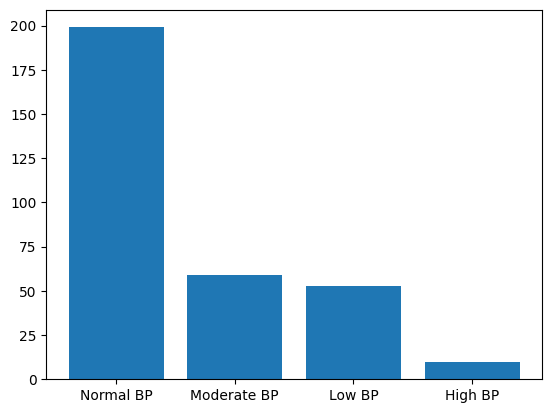

In [196]:
plt.bar(df['BP_Category'].value_counts().index, df['BP_Category'].value_counts().values)

**Insulin**

In [197]:
def categorize_insulin(insulin):
    if insulin < 30:
        return 'Low Insulin'
    elif insulin < 120:
        return 'Normal Insulin'
    else:
        return 'High Insulin'

df['Insulin_Category'] = df['Insulin'].apply(categorize_insulin)

In [198]:
df.groupby("Insulin_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                      mean count
Insulin_Category                
High Insulin      0.439490   157
Low Insulin       0.000000     6
Normal Insulin    0.113924   158

<BarContainer object of 3 artists>

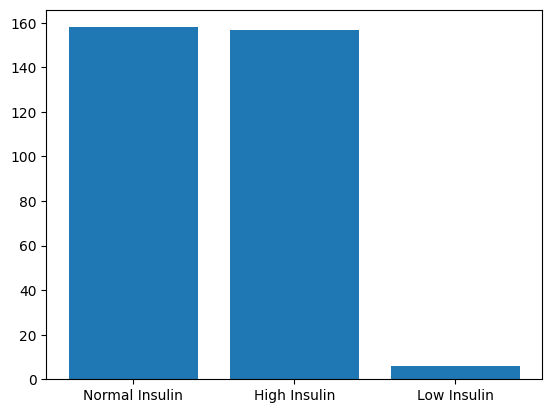

In [199]:
plt.bar(df['Insulin_Category'].value_counts().index, df['Insulin_Category'].value_counts().values)

**BMI**

In [200]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

In [201]:
df.groupby("BMI_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                  mean count
BMI_Category                
Healthy       0.048780    41
Obese         0.354369   206
Overweight    0.164384    73
Underweight   0.000000     1

<BarContainer object of 4 artists>

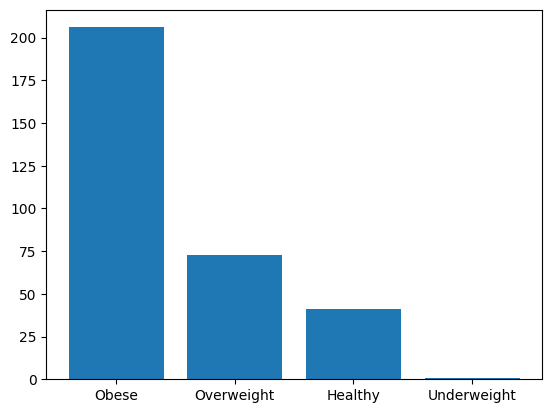

In [202]:
plt.bar(df['BMI_Category'].value_counts().index, df['BMI_Category'].value_counts().values)

**Age**

In [203]:
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif age < 31:
        return 'Young Adult'
    elif age < 45:
        return 'Middle Aged Adult'
    elif age < 60:
        return 'Old Adult'
    else:
        return 'Senior'

df['Age_Category'] = df['Age'].apply(categorize_age)

In [204]:
df.groupby("Age_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                       mean count
Age_Category                     
Middle Aged Adult  0.487179    78
Old Adult          0.578947    19
Young Adult        0.169643   224

<BarContainer object of 3 artists>

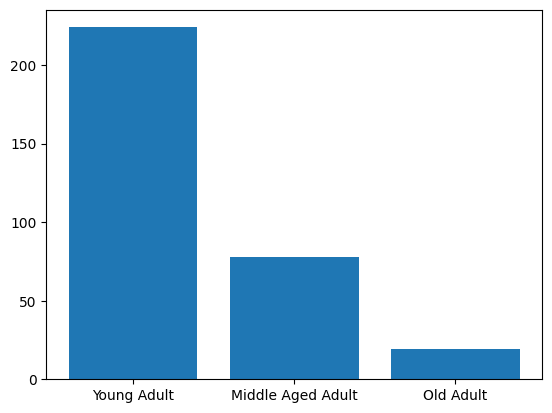

In [205]:
plt.bar(df['Age_Category'].value_counts().index, df['Age_Category'].value_counts().values)

In [206]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Category,Glucose_Category,BP_Category,Insulin_Category,BMI_Category,Age_Category
3,1,89,66,23,94,28.1,0.167,21,0,Low Pregnancies,Normal Glucose,Normal BP,Normal Insulin,Overweight,Young Adult
6,3,78,50,32,88,31.0,0.248,26,1,Moderate Pregnancies,Normal Glucose,Low BP,Normal Insulin,Obese,Young Adult
14,5,166,72,19,175,25.8,0.587,51,1,Moderate Pregnancies,Diabetes,Normal BP,High Insulin,Overweight,Old Adult
16,0,118,84,47,230,45.8,0.551,31,1,Zero Pregnancies,Prediabetes,Moderate BP,High Insulin,Obese,Middle Aged Adult
19,1,115,70,30,96,34.6,0.529,32,1,Low Pregnancies,Prediabetes,Normal BP,Normal Insulin,Obese,Middle Aged Adult


### Conversion of Categorical Variable to One-Hot Encoding

In [207]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [208]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [209]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [210]:
df = one_hot_encoder(df, ohe_cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Category_Low Pregnancies,...,BP_Category_Low BP,BP_Category_Moderate BP,BP_Category_Normal BP,Insulin_Category_Low Insulin,Insulin_Category_Normal Insulin,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Category_Old Adult,Age_Category_Young Adult
3,1,89,66,23,94,28.1,0.167,21,0,True,...,False,False,True,False,True,False,True,False,False,True
6,3,78,50,32,88,31.0,0.248,26,1,False,...,True,False,False,False,True,True,False,False,False,True
14,5,166,72,19,175,25.8,0.587,51,1,False,...,False,False,True,False,False,False,True,False,True,False
16,0,118,84,47,230,45.8,0.551,31,1,False,...,False,True,False,False,False,True,False,False,False,False
19,1,115,70,30,96,34.6,0.529,32,1,True,...,False,False,True,False,True,True,False,False,False,False


In [211]:
df.shape

(321, 25)

# Training and Test Split

In [212]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [214]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5, 
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=2)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=0)

In [215]:
y_preds = clf.predict(X_test)

In [216]:
X_test.shape

(65, 24)

In [217]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.8000
Precision 0.7647
Recall 0.5909
F1 0.6667


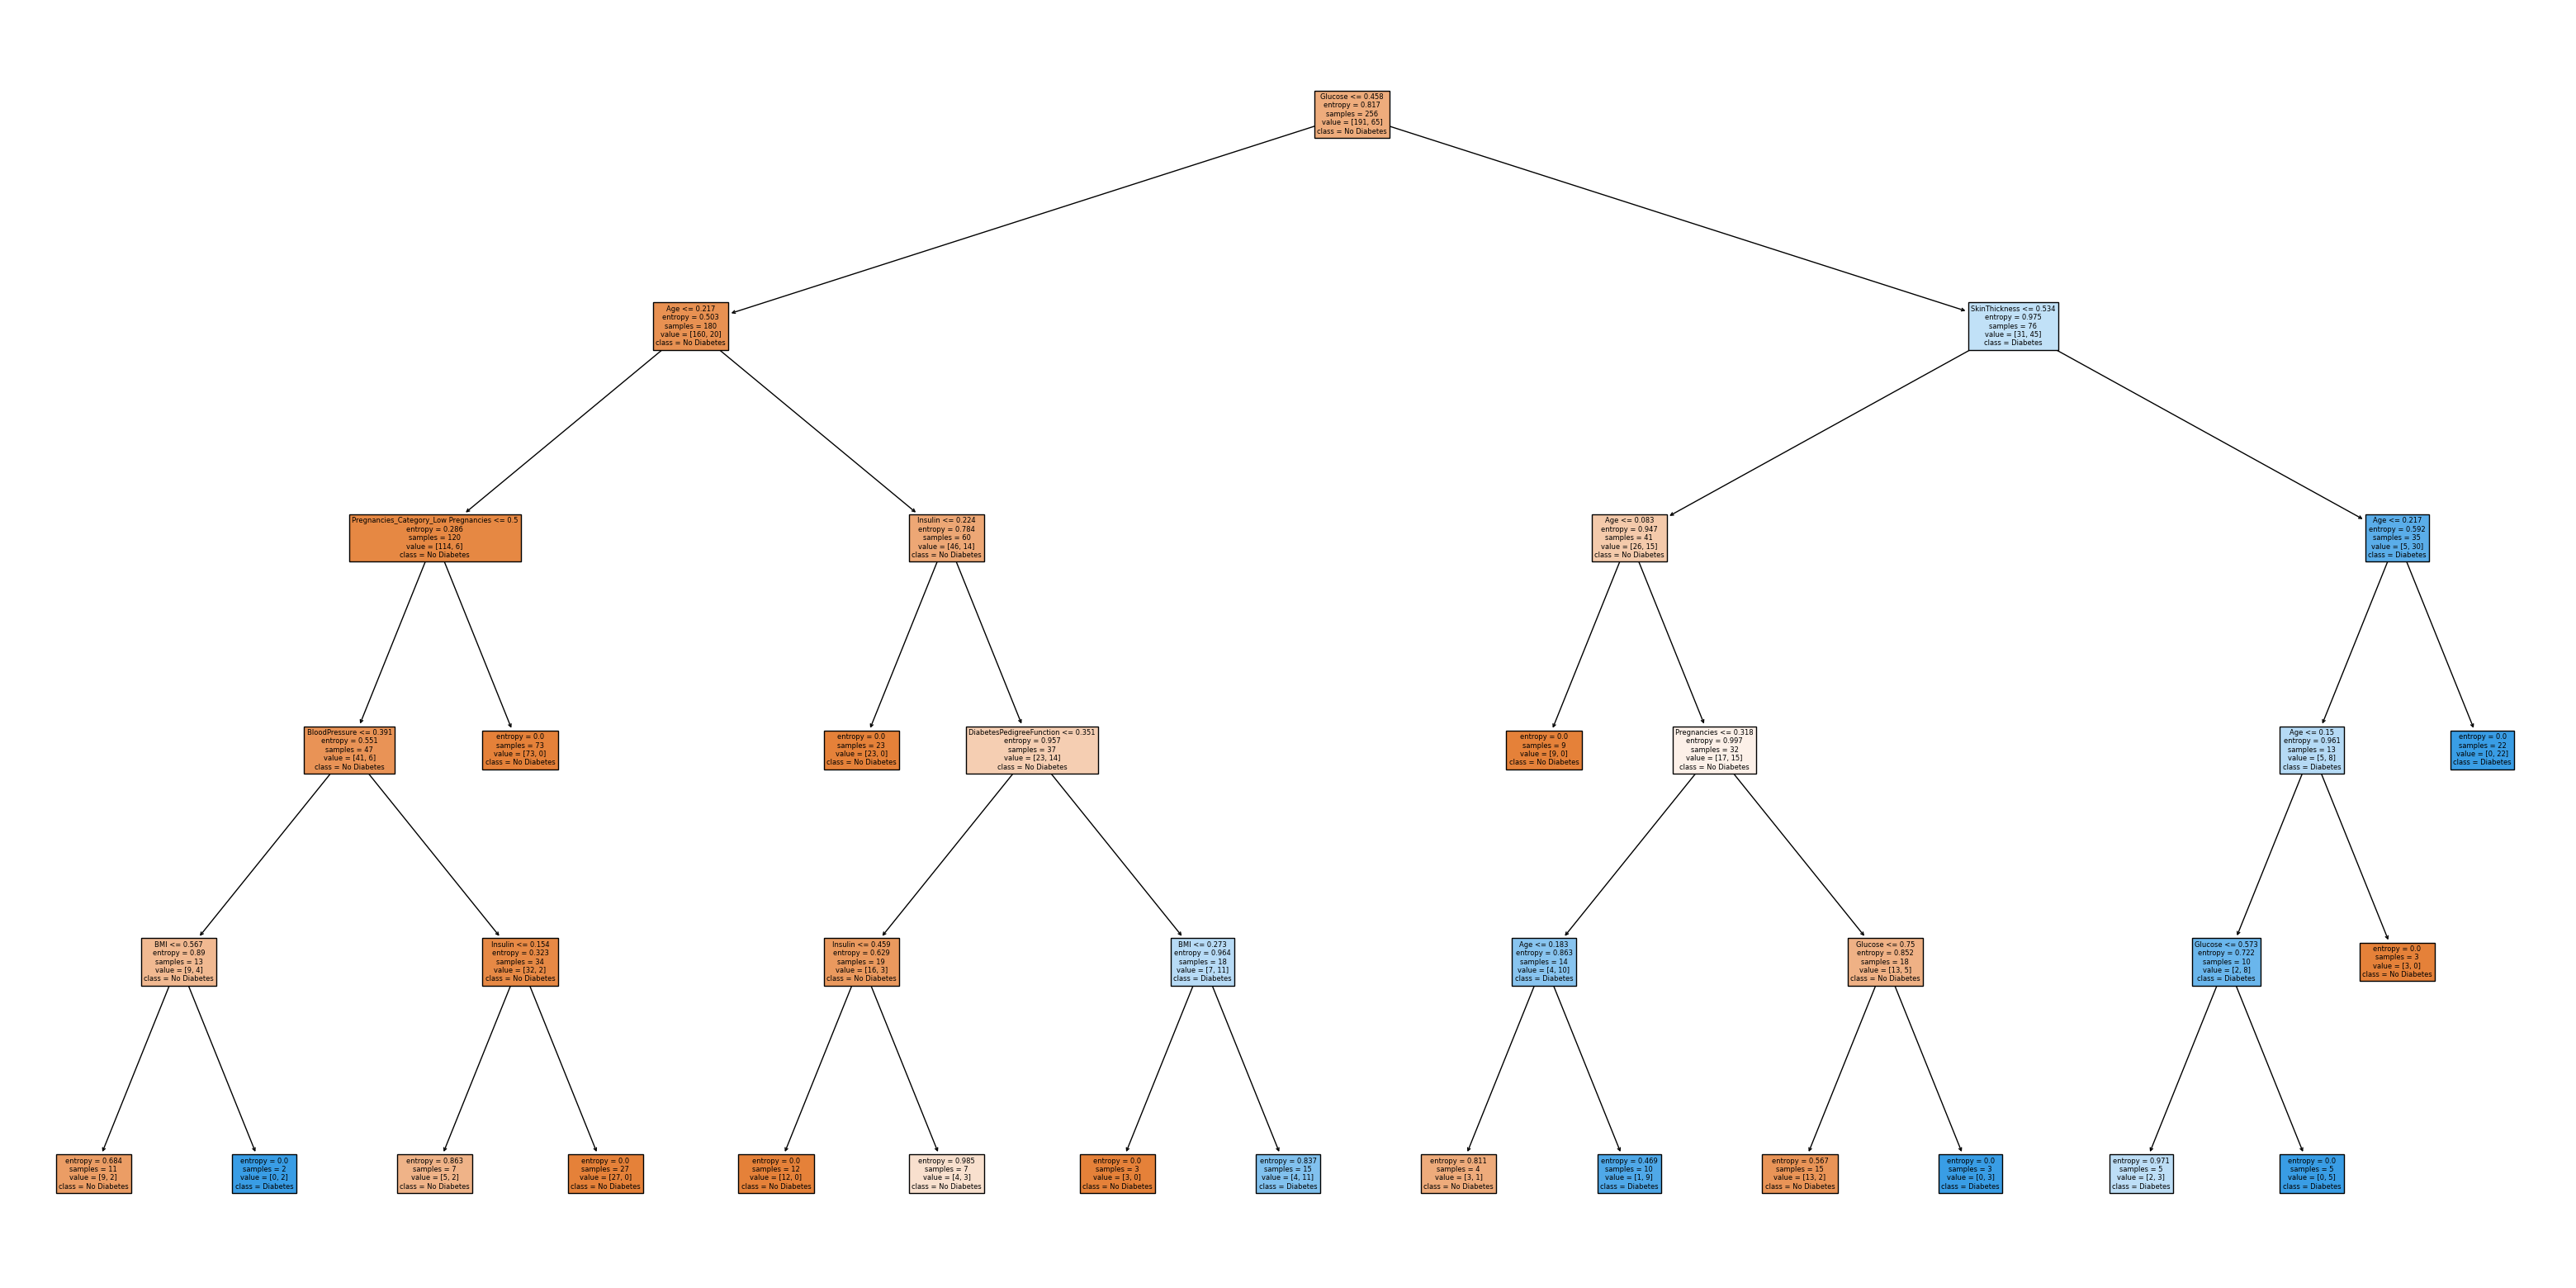

In [218]:
plt.figure(figsize=(40, 20))
plot_tree(clf, 
          feature_names=list(X.columns),
          class_names=['No Diabetes', 'Diabetes'],
          filled=True)

plt.savefig('decision_tree_plot.png')

# Miscellaneous

### Feature Importance

**Random Forest Classifier**

In [219]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier Feature Importances')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
print(feature_importance_df)

                                      Feature  Importance
1                                     Glucose    0.191828
7                                         Age    0.106496
5                                         BMI    0.104177
4                                     Insulin    0.098104
3                               SkinThickness    0.097789
6                    DiabetesPedigreeFunction    0.093816
2                               BloodPressure    0.063614
0                                 Pregnancies    0.058655
23                   Age_Category_Young Adult    0.035902
13               Glucose_Category_Prediabetes    0.022442
18            Insulin_Category_Normal Insulin    0.021710
12            Glucose_Category_Normal Glucose    0.019577
8        Pregnancies_Category_Low Pregnancies    0.016165
16                      BP_Category_Normal BP    0.012255
9   Pregnancies_Category_Moderate Pregnancies    0.011600
10      Pregnancies_Category_Zero Pregnancies    0.009971
19            

**Recursive Feature Elimination**

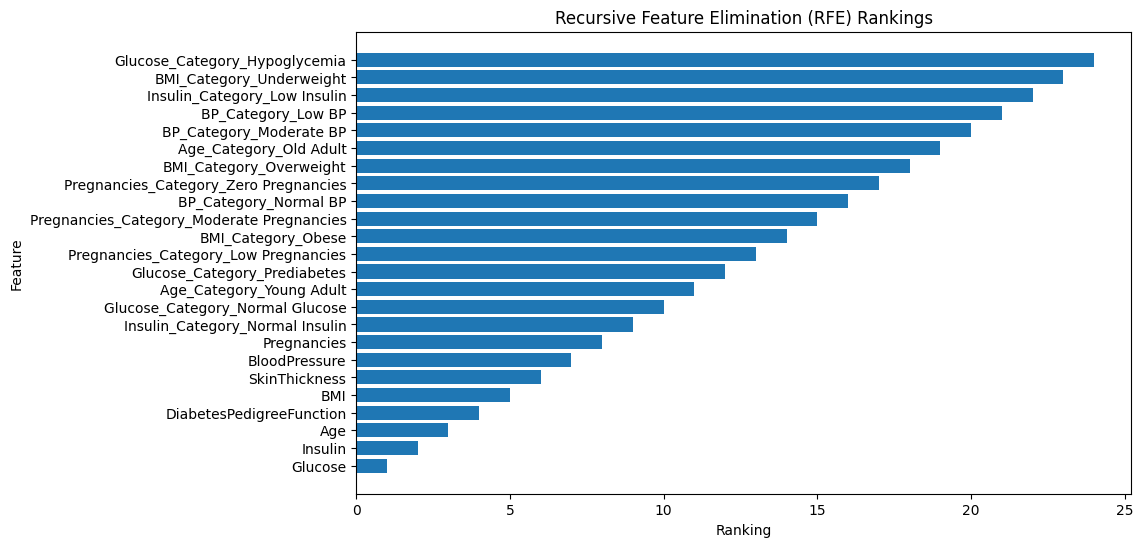

In [ ]:
from sklearn.feature_selection import RFE

# Create an estimator (e.g., RandomForestClassifier)
estimator = RandomForestClassifier()

# Perform RFE
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Get feature ranking
feature_ranking = rfe.ranking_

# Create a DataFrame to store feature names and their rankings
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Recursive Feature Elimination (RFE) Rankings')
plt.show()


In [ ]:
print(ranking_df)

                                      Feature  Ranking
1                                     Glucose        1
4                                     Insulin        2
7                                         Age        3
6                    DiabetesPedigreeFunction        4
5                                         BMI        5
3                               SkinThickness        6
2                               BloodPressure        7
0                                 Pregnancies        8
18            Insulin_Category_Normal Insulin        9
12            Glucose_Category_Normal Glucose       10
23                   Age_Category_Young Adult       11
13               Glucose_Category_Prediabetes       12
8        Pregnancies_Category_Low Pregnancies       13
19                         BMI_Category_Obese       14
9   Pregnancies_Category_Moderate Pregnancies       15
16                      BP_Category_Normal BP       16
10      Pregnancies_Category_Zero Pregnancies       17
20        

### Confusion Matrix

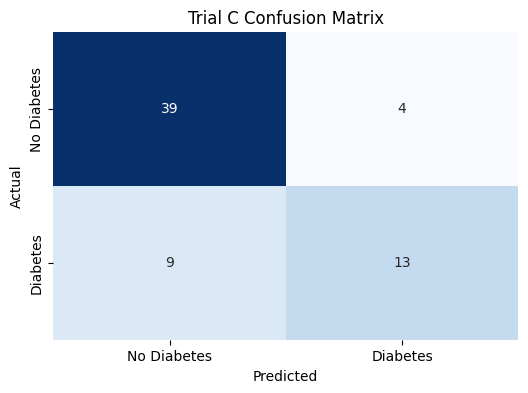

In [ ]:
from sklearn.metrics import confusion_matrix

# Actual target values
y_true = y_test  

# Create a confusion matrix
confusion = confusion_matrix(y_true, y_preds)

# Create custom labels for the axes
labels = ['No Diabetes', 'Diabetes']

# Create a heatmap with custom labels
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Trial C Confusion Matrix')
plt.show()